In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive
from var import fname2mname, network2pair, network_sort_key

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
    "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results_test_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [4]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [5]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [6]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [7]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

elmo_original_0
           minlinreg   maxcorr   mincorr  maxlinreg
minlinreg   1.000000  0.771616  0.770745   0.968793
maxcorr     0.771616  1.000000  0.925646   0.722636
mincorr     0.770745  0.925646  1.000000   0.718244
maxlinreg   0.968793  0.722636  0.718244   1.000000
elmo_original_1
           minlinreg   maxcorr   mincorr  maxlinreg
minlinreg   1.000000  0.480988  0.776608   0.842912
maxcorr     0.480988  1.000000  0.286161   0.668495
mincorr     0.776608  0.286161  1.000000   0.639306
maxlinreg   0.842912  0.668495  0.639306   1.000000
elmo_original_2
           minlinreg   maxcorr   mincorr  maxlinreg
minlinreg   1.000000  0.627049  0.803457   0.831522
maxcorr     0.627049  1.000000  0.467823   0.745922
mincorr     0.803457  0.467823  1.000000   0.640187
maxlinreg   0.831522  0.745922  0.640187   1.000000


### Distributions

In [8]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



elmo_original_0:

minlinreg

maxcounts
elmo_original_1    1024
dtype: int64

mincounts
elmo_original_2    1024
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.968793  0.989114
min  0.968793  1.000000  0.994329
med  0.989114  0.994329  1.000000

maxcorr

maxcounts
elmo_original_1    712
elmo_original_2    312
dtype: int64

mincounts
elmo_original_2    712
elmo_original_1    312
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.925646  0.985811
min  0.925646  1.000000  0.974360
med  0.985811  0.974360  1.000000

mincorr

maxcounts
elmo_original_1    712
elmo_original_2    312
dtype: int64

mincounts
elmo_original_2    712
elmo_original_1    312
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.925646  0.985811
min  0.925646  1.000000  0.974360
med  0.985811  0.974360  1.000000

maxlinreg

maxcounts
elmo_original_1    1024
dtype: int64

mincounts
elmo_original_2    1024
dtype: int64

corr_df_pctl
     

# LinCKA

In [9]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(lincka_df.columns)

In [10]:
network = "elmo_original_0"
lincka_df.sort_values(by=network)[network]

elmo_original_2    0.500198
elmo_original_1    0.688916
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

# RBFCKA

In [11]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [12]:
# rbfcka_df

In [13]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [14]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [15]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [16]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [17]:
network = "elmo_original_0"
sv_sim_df.sort_values(by=network)[network]

elmo_original_2    0.404964
elmo_original_1    0.531194
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

### PWCCA

In [18]:
network = "elmo_original_0"
pw_sim_df.sort_values(by=network)[network]

elmo_original_2    0.490601
elmo_original_1    0.614226
elmo_original_0         NaN
Name: elmo_original_0, dtype: float64

# Heatmaps

In [19]:
plt.rcParams["figure.figsize"] = (20,15)

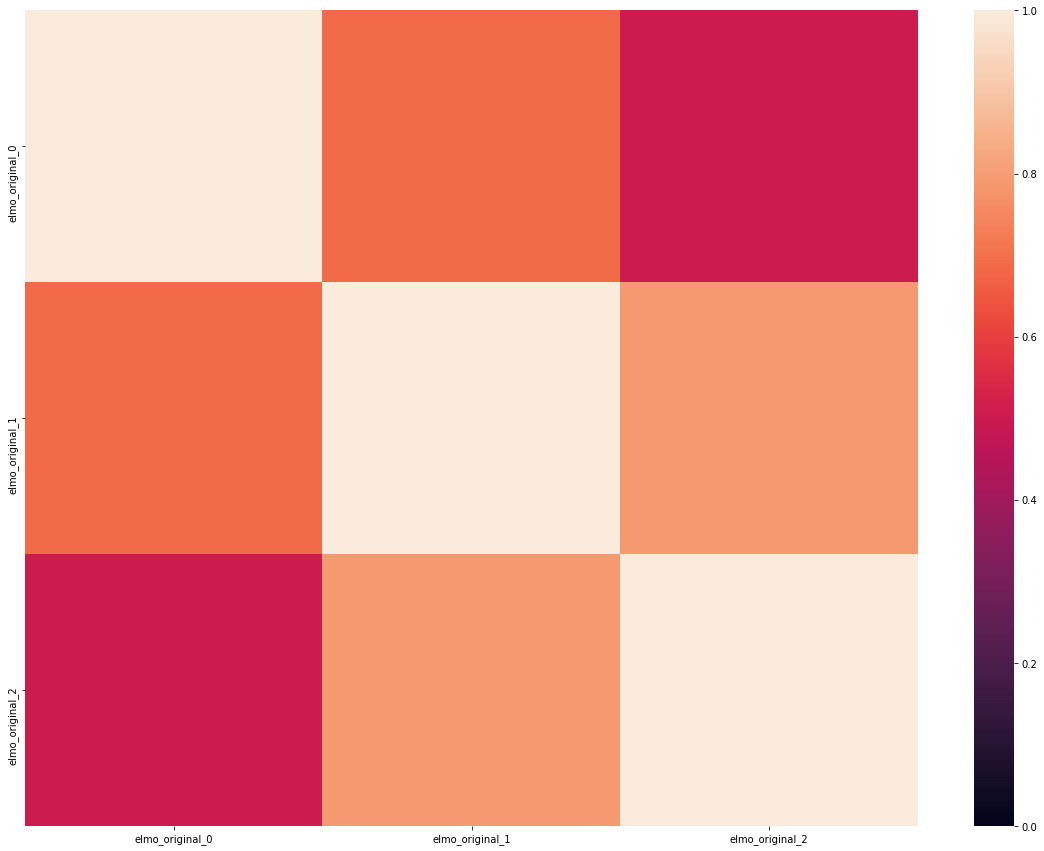

In [20]:
# lincka
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)

In [21]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname, transparent=True)
        plt.show()

In [22]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_test_pw_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [23]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_test_sv_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [24]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_test_maxmincorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [25]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_test_linregcorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [26]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [27]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

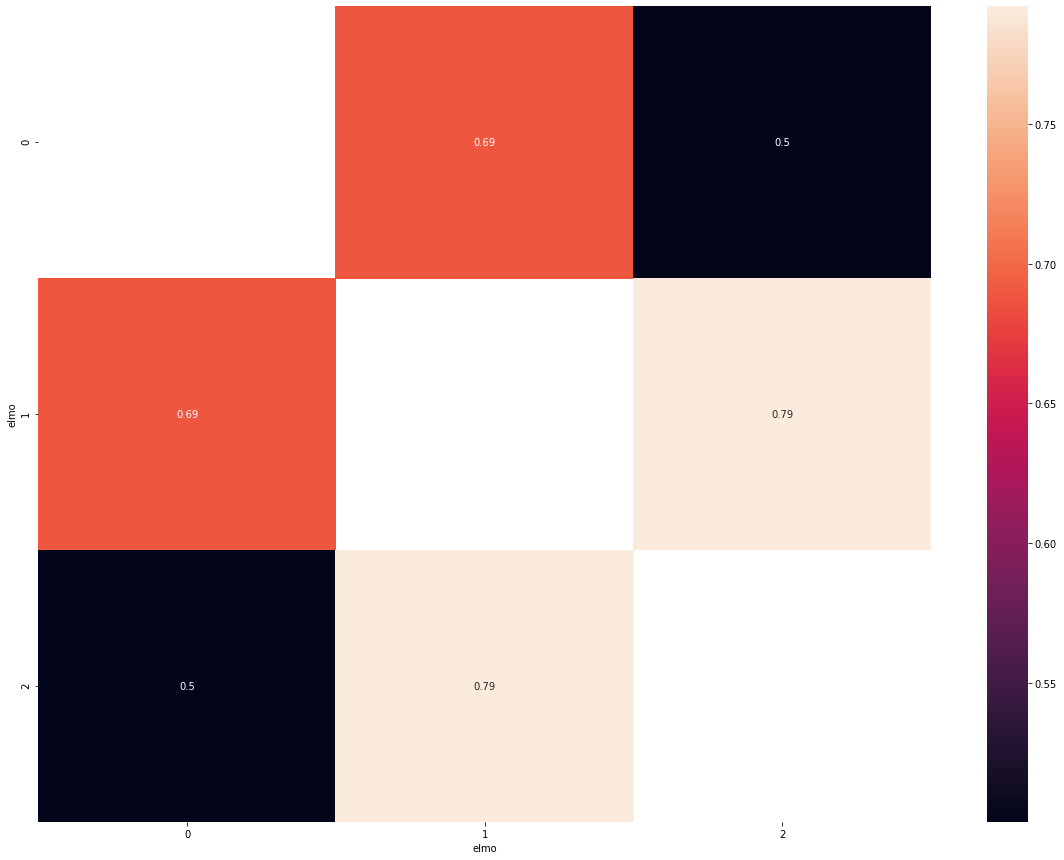

In [28]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

# Localized vs distributed

In [29]:
locl_meth = "maxcorr"
dist_meth = "lincka"

In [34]:
# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['similarities'])
dist_df = dist_df.reindex(dist_df.columns)

In [45]:
# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

In [49]:
# diff_ser
diff_ser = locl_ser - dist_ser

In [54]:
diff_ser.sort_values()

elmo_original_1   -0.629896
elmo_original_2    0.634602
elmo_original_0    1.066226
dtype: float64